# Women's Clothing E-Commerce Reviews

This is the dataset used for the study. This dataset consists of reviews written by real customers, hence it has been anonymized, 
i.e. customer names were not included, and references to the company were replaced with 'retailer'.This dataset includes 23486 
<b>rows</b> and 10 <b>feature</b> variables.

# <b>Features</b>

Each row corresponds to a customer review, and includes the following variables:

<b>Clothing ID</b>: 
           Integer Categorical variable that refers to the specific piece being reviewed.

<b>Age</b>: 
           Positive Integer variable of the reviewers age.

<b>Title</b>: 
           String variable for the title of the review.

<b>Review Text</b>: 
           String variable for the review body.

<b>Rating</b>:  
           Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

<b>Recommended IND</b>:  
           Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

<b>Positive Feedback Count</b>: 
           Positive Integer documenting the number of other customers who found this review positive.

<b>Division Name</b>: 
           Categorical name of the product high level division.

<b>Department Name</b>: 
           Categorical name of the product department name.

<b>Class Name</b>: 
           Categorical name of the product class name.

# Goal

In this analysis, I have implemented models based on <b>NLP</b> that predicts a product’s chances of success based on text reviews of 
the product. Such a system can help a textile manager handle a large number of products. The time consumed to apply the model on 
new data is just a matter of minutes or even seconds and this can be taken advantage of at a high frequency. 

My goal is trying to predict whether the product is <b>recommended or not recommended</b> according to the review from the 
customers.Thus, it is a <b>classification</b> problem in <b>supervised learning</b>.

# Metrics

Since, my dataset is an imbalanced one, I used <b>AUC-ROC</b> as my metric.

# Limitations

This dataset is an <b>imbalanced</b> one.That is, in the target column 'Recommended', most of the products which are given 
reviews as recommended(1) by customers  and there are least number of products which are not recommended(0).

# Walking Through EDA

My variable of interest is <b>Review Text</b>.

There are 135 rows and 20 columns as <b>outliers</b>.I have dropped them as I felt they are irrelevant in our dataset. 

There are not much important <b>missing values</b> for <b>imputing</b>;I replaced those missing features with some text.

Hyperparameter tuning with <b>GridSearchCV</b> is <b>implemented</b> that gave as additional insights.

# Findings

I have done modelling using 5 different algorithms:
    
   1.<b>Logistic Regression</b>:auc-roc score ~0.82,after GridSearchCV score was the same.So,the chosen parameters was the best.
        
   2.<b>Naive Bayes</b>:auc-roc score ~0.84,after GridSearchCV score was ~0.82,which is worst than before.So,the chosen 
        parameters was not the best.
        
   3.<b>Decision Tree Classifier</b>:auc-roc score ~0.64,after GridSearchCV score was ~0.69,which is better than before.So,the 
        chosen parameters was the best.
        
   4.<b>Random Forest Classifier</b>:auc-roc score ~0.61,after GridSearchCV score was ~0.73.So,the chosen parameters was the  best.
    
   5.<b>Support Vector Machine</b>:auc-roc score ~0.79,trying GridSearchCV,it was still running.

# Analysis

In [364]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [365]:
# Loading the dataset
data = 'dataset.csv'
df = pd.read_csv(data)

In [366]:
# Printing the first 10 rows
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [367]:
# Deleting the Unnamed: 0 column as it is of no use
del(df['Unnamed: 0'])

In [368]:
# Renaming
df.rename(columns = {'Recommended IND':'Recommended'}, inplace=True)

In [369]:
# Checking the column names
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [370]:
# df.head()

In [371]:
# Dimension of the dataset
df.shape

(23486, 10)

In [372]:
# Summary statistics
df.describe()

,Clothing ID,Age,Rating,Recommended,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [373]:
# To find the  data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended                23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [374]:
# Checking for nulls
df.isnull().sum().sort_values(ascending=False)

Title                      3810
Review Text                 845
Class Name                   14
Department Name              14
Division Name                14
Positive Feedback Count       0
Recommended                   0
Rating                        0
Age                           0
Clothing ID                   0
dtype: int64

In [375]:
# Replacing the Nan's 
df['Title'].fillna('No Review',inplace=True)
df['Review Text'].fillna('No Review',inplace=True)
df['Class Name'].fillna('Unknown',inplace=True)
df['Department Name'].fillna('Unknown',inplace=True)
df['Division Name'].fillna('Unknown',inplace=True)

In [376]:
#df.isnull().any()

Some of the entries are missing like Title, Review Text, Class Name, Department Name and  Division Name.

In [377]:
# Checking for unique elements in each of the object columns
n = df.select_dtypes(include=object)
for c in n.columns:
    print(c, ': ', df[c].unique())

Title :  ['No Review' 'Some major design flaws' 'My favorite buy!' ...
 'Cute, but see through'
 'Very cute dress, perfect for summer parties and we'
 'Please make more like this one!']
Review Text :  ['Absolutely wonderful - silky and sexy and comfortable'
 'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'
 'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major 

In [378]:
# Checking for unique elements in each of the numeric columns
n = df.select_dtypes(exclude=object)
for c in n.columns:
    print(c, ': ', df[c].unique())

Clothing ID :  [ 767 1080 1077 ...  181  721  522]
Age :  [33 34 60 50 47 49 39 24 53 44 41 32 55 31 28 46 21 36 65 29 38 59 40 23
 67 48 43 52 56 66 61 57 58 37 27 62 68 51 83 69 54 63 71 30 35 64 42 22
 26 72 25 45 74 70 20 80 93 82 77 85 73 78 79 19 76 84 75 89 81 90 94 86
 99 18 91 87 92]
Rating :  [4 5 3 2 1]
Recommended :  [1 0]
Positive Feedback Count :  [  0   4   6   1  14   2   3   7   5   9  34  10  17  11  24  12   8  13
  20  16  23  15  19  29  32  30  55  84  27  43  21  42  37  71  35  65
 117  33  18  25  47  22  51  94  31  77  61  46  26  28  36  57  45  66
  82  44  81  58  78  38  49  52 122  41 108  54  40  53  87  64  89  68
  56  98  95  39  93  48  99  50  69  59]


# Exploratory Data Analysis

# Univariate Analysis

Trying to explore some of the numeric features and  some of the categorical features like from the dataset.

In [379]:
# Checking on clothing id to know whether each id have more number of reviews
df['Clothing ID'].value_counts()

1078    1024
862      806
1094     756
1081     582
872      545
829      527
1110     480
868      430
895      404
936      358
867      351
850      338
1095     327
863      306
1077     297
1059     294
1086     291
1080     289
860      288
1083     249
861      244
873      238
828      225
1092     220
1033     220
927      214
1056     213
820      211
836      205
1022     205
        ... 
88         1
72         1
56         1
1191       1
1175       1
1183       1
1127       1
887        1
600        1
648        1
680        1
712        1
137        1
105        1
89         1
73         1
57         1
41         1
25         1
9          1
1176       1
1160       1
1032       1
856        1
808        1
792        1
776        1
744        1
728        1
0          1
Name: Clothing ID, Length: 1206, dtype: int64

(array([ 195.,  395.,  391.,  353.,  304.,  346., 2841., 7817., 7144.,
        3700.]),
 array([   0. ,  120.5,  241. ,  361.5,  482. ,  602.5,  723. ,  843.5,
         964. , 1084.5, 1205. ]),
 <a list of 10 Patch objects>)

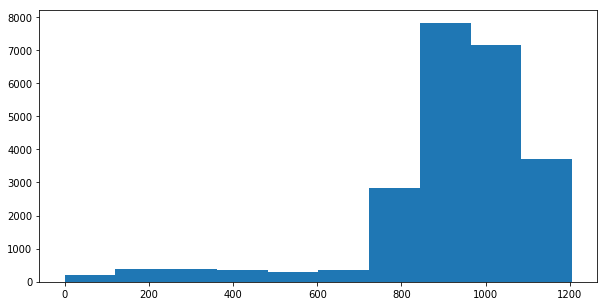

In [380]:
# Plotting the clothind id to determine which one got most reviews
plt.figure(figsize=(10,5))
plt.hist(x = 'Clothing ID', data = df)

Clothing ID with id's 750-1000 are mostly being reviewed.

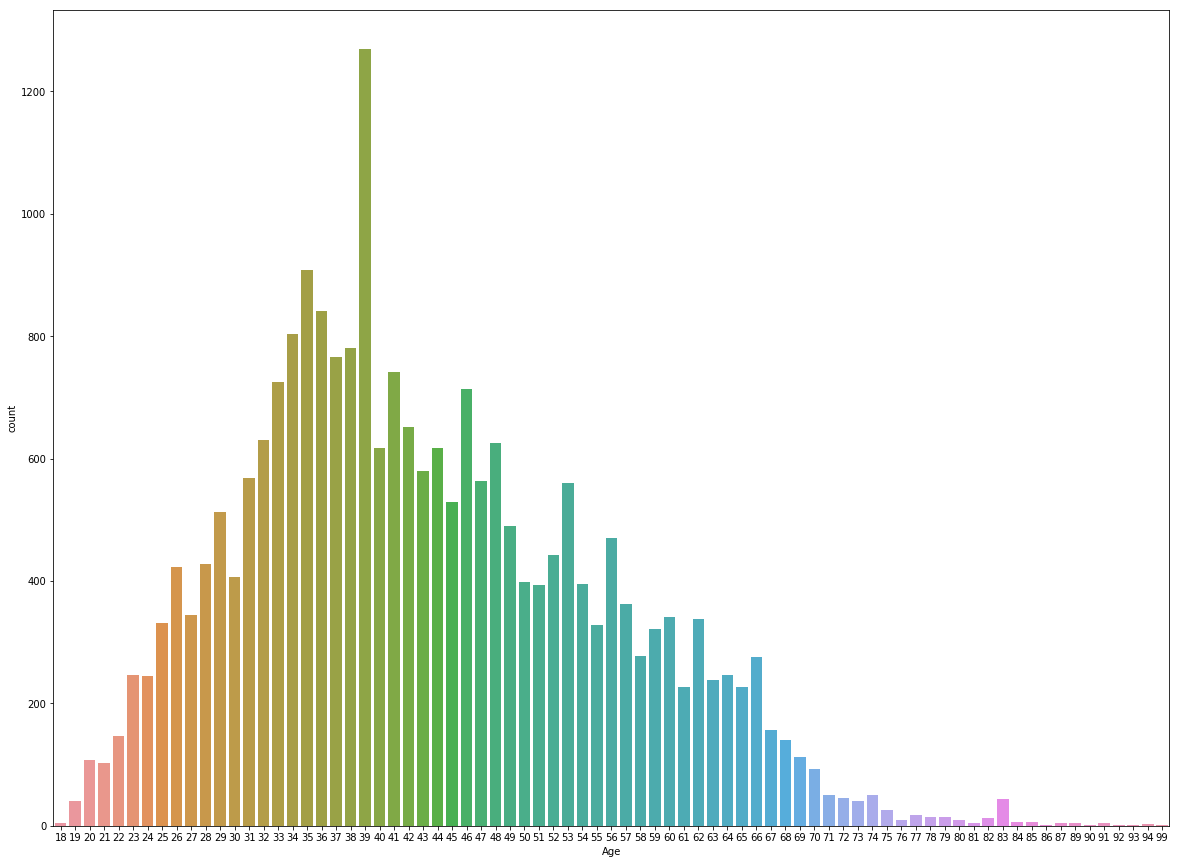

In [381]:
# Plotting the age of customers who have reviewed and rated the online shopping and stuff
plt.figure(figsize=(20,15))
sns.countplot(x = 'Age', data = df)

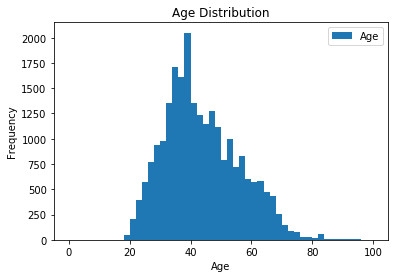

In [382]:
# Age Distribution
df.plot(kind = "hist",y = "Age",bins = 50,range = (0,100)) 
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show() 

From the above plot, we can say that the age group below 20 and above 70 gave less rating. It is obvious. People in this age 
group are not generally bothered about online shopping and reviews. The age group 30-40 gave more reviews and ratings as compared
to all the other age groups. In fact, this is the age group who gave most of the reviews and ratings. 

In [383]:
df['Age Group(0-10)'] = df['Age'].apply(lambda x: 1 if x > 0 & x <= 10 else 0)
df['Age Group(11-20)'] = df['Age'].apply(lambda x: 1 if x > 10 & x <= 20 else 0)
df['Age Group(21-30)'] = df['Age'].apply(lambda x: 1 if x > 20 & x <= 30 else 0)
df['Age Group(31-40)'] = df['Age'].apply(lambda x: 1 if x > 30 & x <= 40 else 0)
df['Age Group(41-50)'] = df['Age'].apply(lambda x: 1 if x > 40 & x <= 50 else 0)
df['Age Group(51-60)'] = df['Age'].apply(lambda x: 1 if x > 50 & x <= 60 else 0)
df['Age Group(61-70)'] = df['Age'].apply(lambda x: 1 if x > 60 & x <= 70 else 0)
df['Age Group(71-80)'] = df['Age'].apply(lambda x: 1 if x > 70 & x <= 80 else 0)
df['Age Group(81-90)'] = df['Age'].apply(lambda x: 1 if x > 80 & x <= 90 else 0)
df['Age Group(91-100)'] = df['Age'].apply(lambda x: 1 if x > 90 & x <= 100 else 0)

In [384]:
#df.tail()

In [385]:
# Rating value count
df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

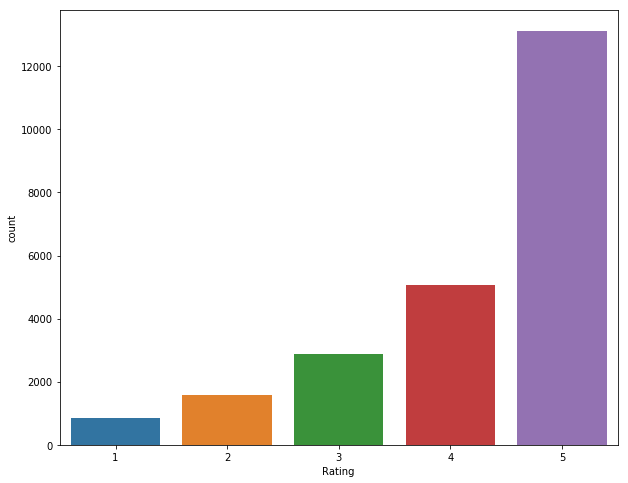

In [386]:
# Plotting the rating given by the customers for the product they bought
plt.figure(figsize=(10,8))
sns.countplot(x = 'Rating', data = df)

It is evident from the plot that customers are mostly given 5 star ratings.

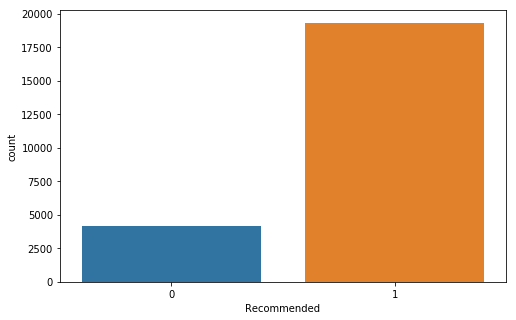

In [387]:
# Plotting for the binary variable recommended such that whether the customer recommends the product is 1 if recommended,whereas
# 0 if not recommended. 
plt.figure(figsize=(8,5))
sns.countplot(x = 'Recommended', data = df)

So, here in Recommended feature also most of the customers are recommended those products that they bought to others. 

From,this we can understand that this dataset is an imbalanced one.Later,We can upsample it.

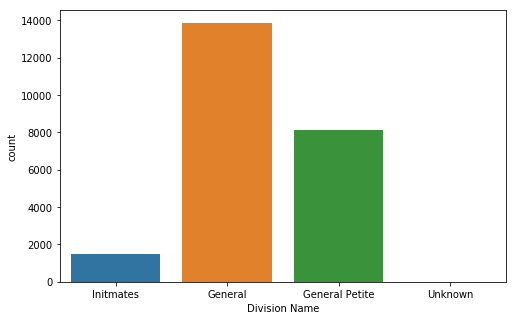

In [388]:
# Plotting division name which is the categorical name of the product high level division 
plt.figure(figsize=(8,5))
sns.countplot(x = 'Division Name', data = df)

From the plot,we can find that the products from divisions General and General petite were more reviewed among the 3 of the 
divisions.

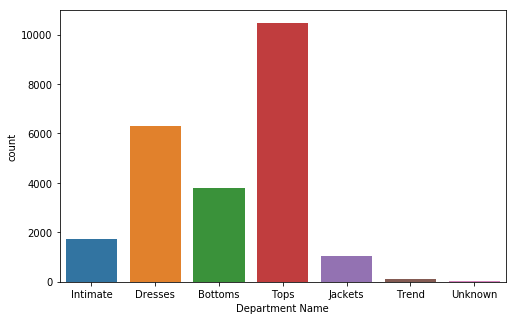

In [389]:
# Plotting department name which is the categorical name of the product department 
plt.figure(figsize=(8,5))
sns.countplot(x = 'Department Name', data = df)

From this plot,Tops are the types in the department that got most reviews.

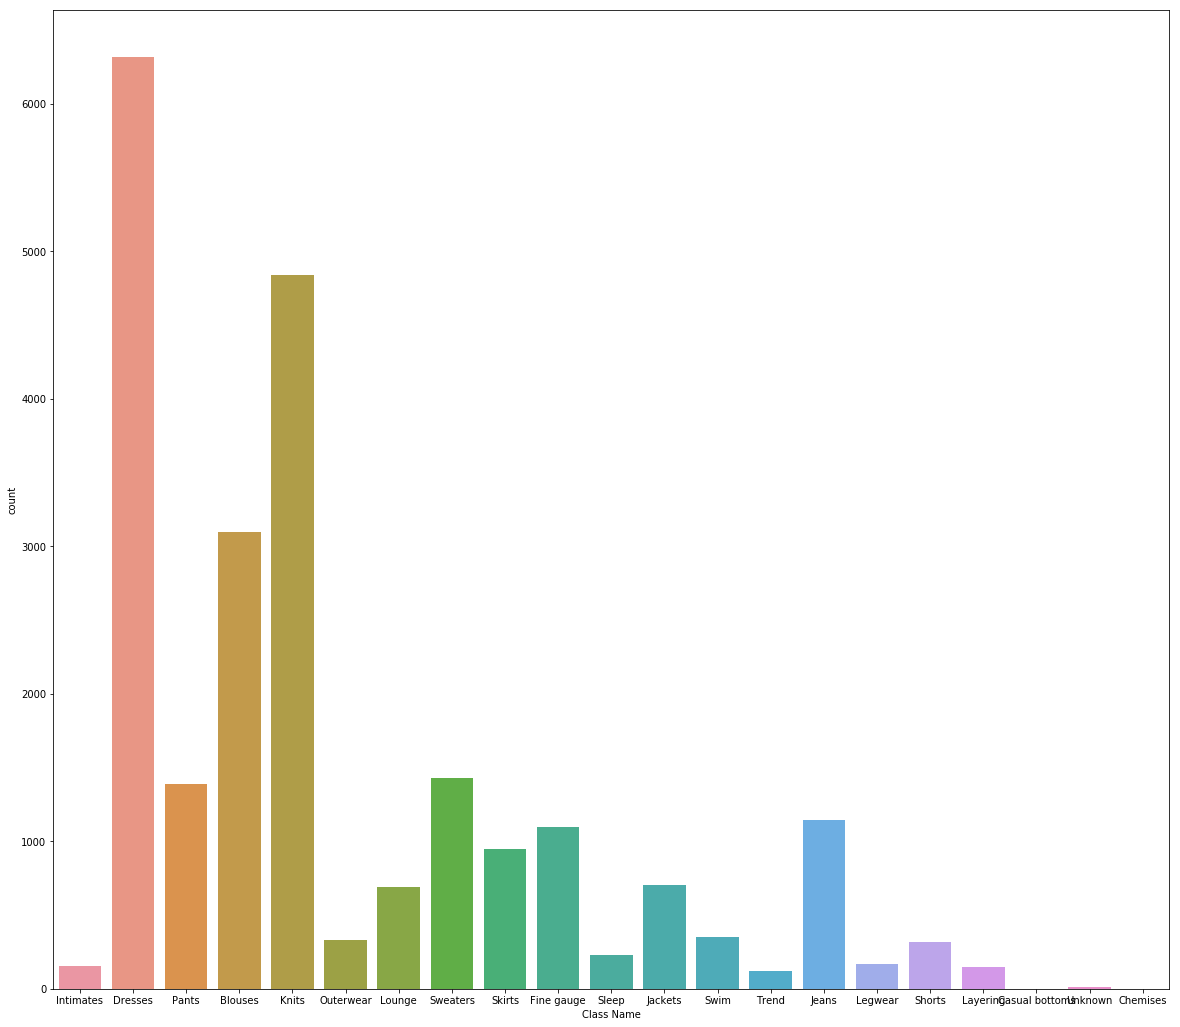

In [390]:
# Plotting class name which is the categorical name of the product class 
plt.figure(figsize=(20,18))
sns.countplot(x = 'Class Name', data = df)

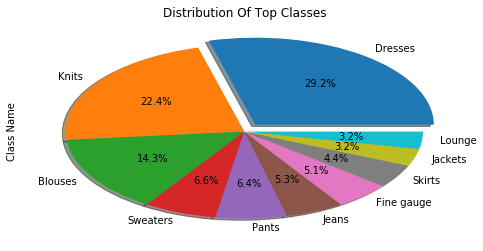

In [391]:
# Plotting the distribution of Neighbourhood with pie-chart.
plt.subplots(figsize=(8,4))
df['Class Name'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.1,0,0,0,0,0,0,0,0,0])
plt.title('Distribution Of Top Classes')
plt.show()

Dresses,Blouses and Knits are most reviewed classes among others.

# Multivariate Analysis

Exploration between different features.

Here,we are trying to know more about the relation of Recommended and Rating.

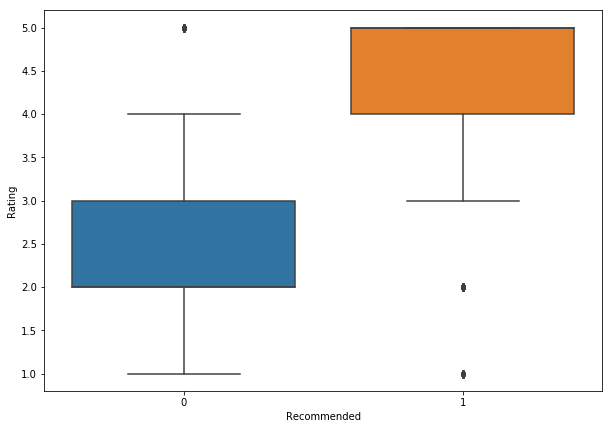

In [395]:
#Plotting using a boxplot to find the relation between 2 features:recommended and rating
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Recommended', y = 'Rating', data=df)

It is evident from this plot that the products which are not recommended(ie;0) have ratings less that 3 whereas those which are 
recommended(ie;1) have almost got 5 star ratings.But there are products which got review as not recommended have a 5 star rating 
and among recommended products there are ratings 1 and 2.It can be considered as outliers.We have to research on that more.

# Exploring More on Outliers

In [396]:
df[df['Recommended'] == 1].shape

(19314, 20)

In [397]:
df[df['Rating'] < 3].shape

(2407, 20)

In [398]:
outlier1 = ((df['Rating'] < 3) & (df['Recommended'] == 1))
outlier1.any()

True

In [399]:
outlier1.value_counts()

False    23376
True       110
dtype: int64

In [400]:
df[df['Recommended'] == 0].shape

(4172, 20)

In [401]:
df[df['Rating'] == 5].shape

(13131, 20)

In [402]:
outlier2 = ((df['Rating'] == 5) & (df['Recommended'] == 0))
outlier2.any()

True

In [403]:
outlier2.value_counts()

False    23461
True        25
dtype: int64

In [404]:
df[outlier1].shape

(110, 20)

In [405]:
df[outlier2].shape

(25, 20)

In [406]:
# Dropping the outliers to make my model accuracy better
df.drop((df[outlier1]).index, inplace=True)

In [407]:
df.drop((df[outlier2]).index, inplace=True)

C:\Users\sreej\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [408]:
#df.shape

In [409]:
#plt.figure(figsize=(10,7))
#sns.boxplot(x = 'Recommended', y = 'Rating', data=df)

In [410]:
# Adding length of review as a separate column
df['Review Length'] = df['Review Text'].apply(len)
df.tail()

,Clothing ID,Age,Title,Review Text,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,...,Age Group(11-20),Age Group(21-30),Age Group(31-40),Age Group(41-50),Age Group(51-60),Age Group(61-70),Age Group(71-80),Age Group(81-90),Age Group(91-100),Review Length
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,...,1,1,1,1,0,1,1,1,1,131
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,...,1,1,1,1,0,0,1,1,1,223
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,...,1,1,1,1,1,1,1,1,1,208
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,...,1,1,0,1,1,0,1,1,1,427
23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses,...,1,1,1,1,1,0,1,1,1,110


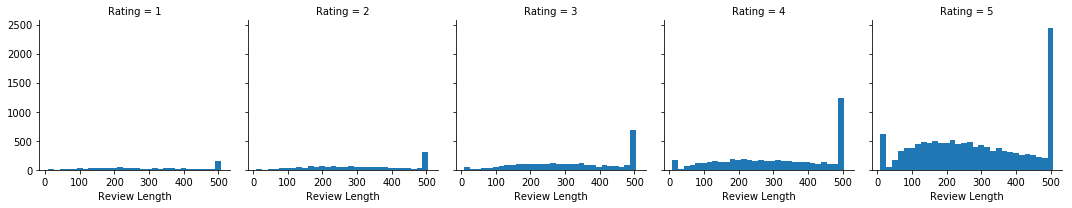

In [411]:
# Length of reviews per rating
rl_rating = sns.FacetGrid(df, col='Rating')
rl_rating.map(plt.hist,'Review Length',bins=30)

From the above plot,we can see that users gives mostly Rating 4 and 5.Also,according to review length,ratings 3,4 and 5 have more
reviews.So,we can see that review length and ratings are qualitatively equal.

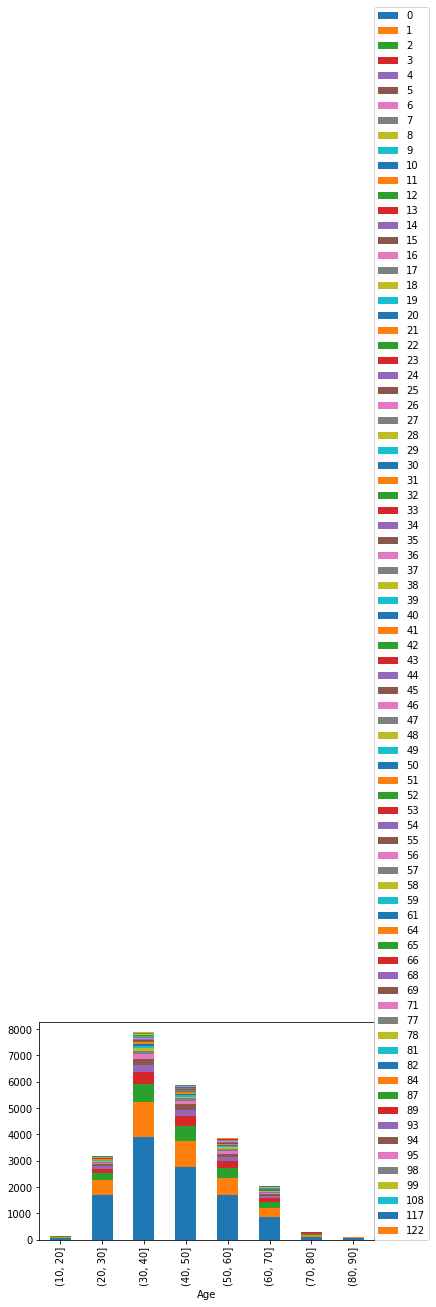

In [412]:
ax = df.groupby(['Positive Feedback Count', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True, legend=False)
    
ax.legend(loc=(1,0))    

As like the age group that we are finding who have given most reviews,those same age group(30-40 years) are giving the most 
positive feedbacks.

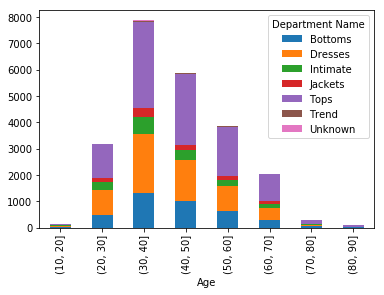

In [413]:
df.groupby(['Department Name', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)       

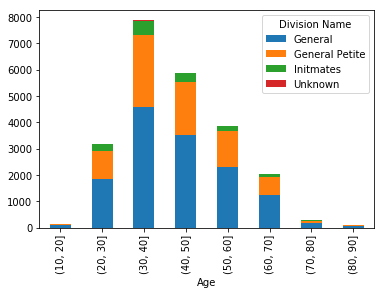

In [414]:
df.groupby(['Division Name', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)       

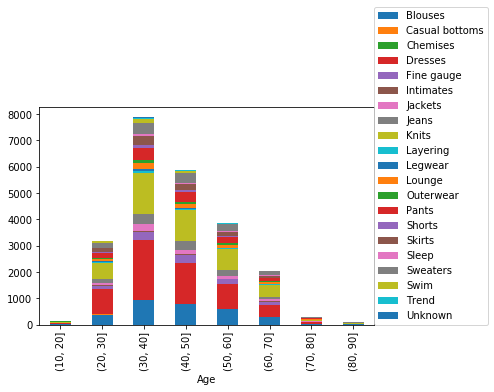

In [415]:
ax = df.groupby(['Class Name', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True, legend=False)
    
ax.legend(loc=(1,0))    

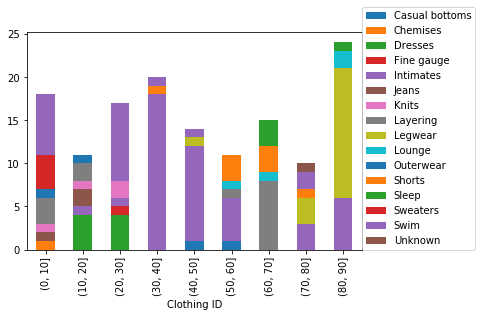

In [416]:
ax = df.groupby(['Class Name', pd.cut(df['Clothing ID'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True, legend=False)
    
ax.legend(loc=(1,0))

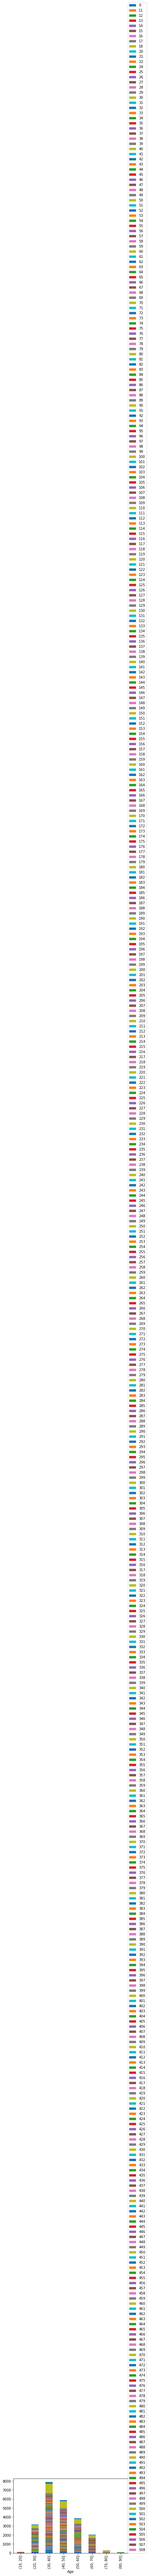

In [417]:
ax = df.groupby(['Review Length', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True, legend=False)
    
ax.legend(loc=(1,0))    

From this Multivariate analysis,we got almost all same results as from univariate analysis.

# Word Distribution and Word Cloud

In [418]:
# Creating a word cloud to know about the most frequent words appearing in our feature
import re

def clean_data(text):
    letters_only = re.sub("[^a-zA-Z]", " ", text) 
    words = letters_only.lower().split()                            
    return( " ".join( words ))   

In [419]:
from wordcloud import WordCloud, STOPWORDS

def create_cloud(rating):
    x= [i for i in rating]
    y= ' '.join(x)
    cloud = WordCloud(background_color='white',width=1600, height=800,max_words=100,stopwords= STOPWORDS).generate(y)
    plt.figure(figsize=(10,8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

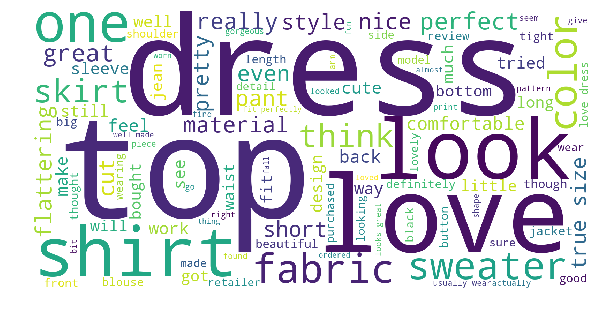

In [420]:
# Word cloud for review text
create_cloud(df['Review Text'])

In [421]:
#create_cloud(df['Department Name'])

In [422]:
#create_cloud(df['Class Name'])

In [423]:
#create_cloud(df['Title'])

# Getting Dummies for cateogorical variables

In [424]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'Age Group(0-10)', 'Age Group(11-20)', 'Age Group(21-30)',
       'Age Group(31-40)', 'Age Group(41-50)', 'Age Group(51-60)',
       'Age Group(61-70)', 'Age Group(71-80)', 'Age Group(81-90)',
       'Age Group(91-100)', 'Review Length'],
      dtype='object')

In [425]:
df = df.drop(['Title','Class Name'], axis=1)

In [426]:
df_new = pd.get_dummies(df)

In [427]:
df_new.head()

,Clothing ID,Age,Rating,Recommended,Positive Feedback Count,Age Group(0-10),Age Group(11-20),Age Group(21-30),Age Group(31-40),Age Group(41-50),...,Division Name_General Petite,Division Name_Initmates,Division Name_Unknown,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,Department Name_Unknown
0,767,33,4,1,0,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
1,1080,34,5,1,4,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2,1077,60,3,0,0,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
3,1049,50,5,1,0,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,0
4,847,47,5,1,6,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0


Change into dummies will help in future,if we are planned for the future step of adding more features for modelling.

# Train-Test Split

In [466]:
# Splitting into train and test set
from sklearn.model_selection import train_test_split
X = df[['Review Text', 'Recommended']]
y = df['Recommended']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [467]:
# We don't need our target column in the test set,so dropping the same
X_test.drop(['Recommended'], inplace=True, axis=1)
X_test.head()

C:\Users\sreej\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Review Text
12217,I have had a lot of complements while wearing ...
11258,"Ordered online in white, just received it, lov..."
15345,"Love this dress. the description says ""pull ov..."
14254,This is a great top. it does run a bit large b...
11191,"My new favorite cozy and stylish ""go-to"" piece..."


# Upsampling of Imbalanced Dataset

In [468]:
X_train.head()

,Review Text,Recommended
4951,"I get a lot of compliments on this dress, it's...",1
19720,This basketweave bikini top in fractals red by...,1
10669,I ordered my normal size in this dress. i am 6...,1
22253,I was hesitant to buy this due to the price bu...,1
11382,These ag stevie ankle jeans only have 50% cott...,0


In [469]:
X_train.shape

(16345, 2)

In [470]:
X_train['Recommended'].value_counts()

1    13373
0     2972
Name: Recommended, dtype: int64

In [471]:
# import for upsampling of minority 'Not Recommended' feature
from sklearn.utils import resample
# Separate minority and majority classes
df_train_notrecommended = X_train[X_train.Recommended==0]
df_train_recommended = X_train[X_train.Recommended==1]
 
# Upsample minority class
df_train_notrecommended_upsampled = resample(df_train_notrecommended, 
                                 replace=True,     # sample with replacement
                                 n_samples=13373,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_train_recommended, df_train_notrecommended_upsampled])
 
# Display new class counts
df_upsampled.Recommended.value_counts()

1    13373
0    13373
Name: Recommended, dtype: int64

In [472]:
# Dependent variable after upsampling
y_upsampled = df_upsampled['Recommended']
#y_upsampled

# Independent variable after upsampling
X_upsampled = df_upsampled['Review Text']
#X_upsampled

In [473]:
# Transforming Reviews using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Datapreprocessing
cvec = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 2)

# Fitting on to the upsampled set and learns vocabulories
cvec.fit(X_upsampled)

# Transforming the train and test
X_train_count_vect = cvec.transform(X_upsampled)
X_test_count_vect = cvec.transform(X_test['Review Text'])

X_train_count_vect

<26746x7359 sparse matrix of type '<class 'numpy.int64'>'
	with 590200 stored elements in Compressed Sparse Row format>

In [474]:
X_test_count_vect

<7006x7359 sparse matrix of type '<class 'numpy.int64'>'
	with 151674 stored elements in Compressed Sparse Row format>

# Modelling

# 1)Logistic Regression

In [475]:
# Import and fit my data with logistic regression and test it too
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_count_vect, y_upsampled)
y_pred_lr = lr.predict(X_test_count_vect)

test_score = roc_auc_score(y_test, y_pred_lr)

test_score

0.8158770620710291

In [476]:
# Doing GridSearchCV to make my score better
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_count_vect, y_upsampled)
print("Best cross-val score: {:.2f}".format(grid.best_score_))
print("Best params: ", grid.best_params_)

Best cross-val score: 0.96
Best params:  {'C': 1}


In [477]:
# Since,we find that our default parameter is the best;we can just print its best estimator
grid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

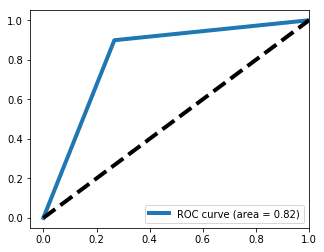

In [478]:
# Plotting with auc-roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for Recommended
plt.figure(figsize=[5,4])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.show()

# 2)Naive Bayes

In [479]:
# Import and fit my data with Naive Bayes and test it too
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_count_vect, y_upsampled)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [480]:
# Applying naive bayes:
y_pred_nb = nb.predict(X_test_count_vect)

performance = roc_auc_score(y_test, y_pred_nb)
performance

0.8365781570987058

In [481]:
# Doing GridSearchCV to make my score better
param_grid = {'alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] }
grid = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_count_vect, y_upsampled)
print("Best cross-val score: {:.2f}".format(grid.best_score_))
print("Best params: ", grid.best_params_)

C:\Users\sreej\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\sreej\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\sreej\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\sreej\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\sreej\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Best cross-val score: 0.96
Best params:  {'alpha': 0.1}


In [483]:
nb = MultinomialNB(alpha=0.1)
nb.fit(X_train_count_vect, y_upsampled)
y_pred_nb = nb.predict(X_test_count_vect)

performance = roc_auc_score(y_test, y_pred_nb)
performance

0.8223104682602523

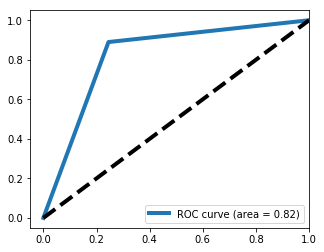

In [484]:
# Plotting with auc-roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_nb)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for Recommended
plt.figure(figsize=[5,4])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.show()

# 3)Decision Tree Classifier

In [485]:
# Import and fit my data with Decision Tree Classifier and test it too
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2)
dt.fit(X_train_count_vect, y_upsampled)
y_pred_dt = dt.predict(X_test_count_vect)

performance = roc_auc_score(y_test, y_pred_dt)
performance

0.6368967039703419

In [486]:
# Doing GridSearchCV to make my score better
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2,5],
    'class_weight':[None, 'balanced']
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_count_vect, y_upsampled)
print("Best cross-val score: {:.2f}".format(grid.best_score_))
print("Best params: ", grid.best_params_)

Best cross-val score: 0.93
Best params:  {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


In [487]:
# Perform DecisionTreeClassifier with best params from gridsearchcv
dt = DecisionTreeClassifier(max_depth = None, min_samples_split = 2, criterion = 'entropy')
dt.fit(X_train_count_vect, y_upsampled)
y_pred_dt = dt.predict(X_test_count_vect)

performance = roc_auc_score(y_test, y_pred_dt)
performance

0.6867019634601561

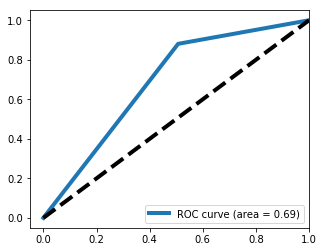

In [488]:
# Plotting with auc-roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for Recommended
plt.figure(figsize=[5,4])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.show()

# 4)Random Forest Classifier

In [489]:
# Import and fit my data with Random Forest Classifier  and test it too
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train_count_vect, y_upsampled)
y_pred_rfc = rfc.predict(X_test_count_vect)

performance = roc_auc_score(y_test, y_pred_rfc)
performance

0.6081606381154285

In [490]:
# Doing GridSearchCV to make my score better
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2,5],
    'class_weight':[None, 'balanced']
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_count_vect, y_upsampled)
print("Best cross-val score: {:.2f}".format(grid.best_score_))
print("Best params: ", grid.best_params_)

Best cross-val score: 0.99
Best params:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


In [491]:
rfc = RandomForestClassifier(max_depth = None, criterion = 'entropy', min_samples_split = 2)
rfc.fit(X_train_count_vect, y_upsampled)
y_pred_rfc = rfc.predict(X_test_count_vect)

performance = roc_auc_score(y_test, y_pred_rfc)
performance

0.7277328438974373

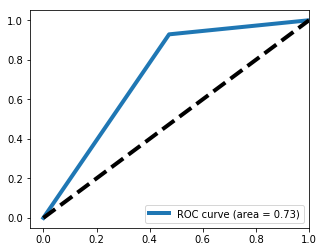

In [492]:
# Plotting with auc-roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_rfc)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for Recommended
plt.figure(figsize=[5,4])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.show()

# 5)Support Vector Machines

In [493]:
# Import and fit my data with Support Vector Machines and test it too
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_count_vect, y_upsampled)
y_pred_svm = svm_model.predict(X_test_count_vect)

performance = roc_auc_score(y_test, y_pred_svm)
performance

0.7912688966163974

In [ ]:
# Doing GridSearchCV to make my score better
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'kernel': ['linear','rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_count_vect, y_upsampled)
print("Best cross-val score: {:.2f}".format(grid.best_score_))
print("Best params: ", grid.best_params_)

In [ ]:
svm_model = SVC()
svm_model.fit(X_train_count_vect, y_upsampled)
y_pred_svm = svm_model.predict(X_test_count_vect)

performance = roc_auc_score(y_test, y_pred_svm)
performance

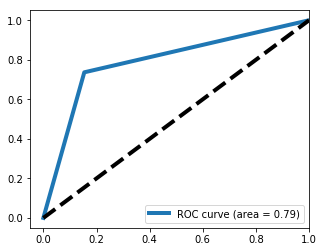

In [495]:
# Plotting with auc-roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for Recommended
plt.figure(figsize=[5,4])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.show()

# Conclusion

With this dataset, it was really interesting to explore the text reviews that can predict whether the product would recommended 
or not. That would be pretty useful information for a fashion business. If such insight was accurately available about a product, 
the product or the textile manager can make sound decisions on the product’s inventory strategy, promotions etc. 

To further improve the model, I can add more features to my model and the dummies that I generated earlier will be helpful for 
a new set of predictions.Also I can perform Sentiment Analysis in future.

# Outcome

Not only will it give companies an insight as to how customers perceive their products and/or services, but it will also give 
them an idea on how to improve their offers.  

Also,it will help companies to earn more money with our recommendation engine model.
